# 0. 패키지 불러오기

In [1]:
import numpy as np
import pandas as pd
import os

- 분석의 목적
    - 신규자격/자격유지 검사 테스트 결과를 토대로 교통사고 위험군이 될 사람을 에측하는 AI모델 제작

# 1. 데이터 불러오기

## 가. EDA
- A(신규자격)
    - 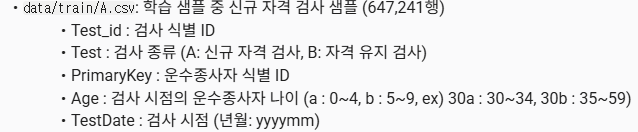
- B(자격유지)
    - 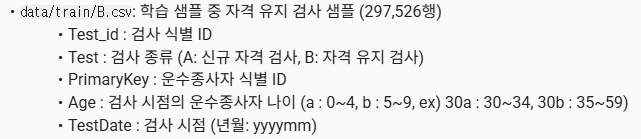

### 1) A검사(신규자격)
- 각 테스트 항목(A1, A2 등)마다 지정된 측정횟수가 존재
- 테스트 항목 컬럼에 데이터의 값이 ','구분 형태로 여러개의 원자값을 보유
    - AI활용을 위해 분해하거나 수치에 기반한 특정값으로 대체를 하는 등 데이터 가공 필요

In [2]:
# A(신규자격) Train 데이터 확인
train_root_dir = './data/train'
train_a_df = pd.read_csv(os.path.join(train_root_dir, 'A.csv'))

In [3]:
train_a_df

,Test_id,Test,PrimaryKey,Age,TestDate,A1-1,A1-2,A1-3,A1-4,A2-1,...,A5-3,A6-1,A7-1,A8-1,A8-2,A9-1,A9-2,A9-3,A9-4,A9-5
0,0x6E4D22D389982D0CC31BD88963950F555DDEC8CAC04D...,A,0x6E4D22D389982D0CC31BD88963950F555DDEC8CAC04D...,60a,201801,"2,2,1,1,1,2,1,1,2,2,1,2,2,2,2,1,1,1","2,1,2,2,1,2,2,3,1,1,1,3,3,3,2,3,1,3","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0","-32,42,10,-6,-11,-20,-80,-54,16,-4,14,33,50,8,...","0,0,2,3,3,3,2,1,2,2,1,2,1,3,3,3,2,1",...,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",5,10,6,1,4,11,1,6,5
1,0xEE79150381336B7C24837F15D2594C20E5558414BC08...,A,0xEE79150381336B7C24837F15D2594C20E5558414BC08...,40a,201801,"1,1,1,2,1,2,2,2,1,1,1,2,2,1,2,2,1,2","2,1,3,2,3,2,1,3,1,1,2,1,2,3,3,3,2,1","1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0","636,9,-3,-26,-3,-21,29,0,14,39,44,29,81,22,0,-...","0,0,2,2,1,3,3,2,2,3,1,1,1,3,2,2,3,1",...,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",12,17,8,4,9,13,2,20,6
2,0xC9E4B719BB6BFB033F23E3388ECDAB18565F2A019B68...,A,0xC9E4B719BB6BFB033F23E3388ECDAB18565F2A019B68...,30b,201801,"1,2,1,1,2,1,1,1,2,1,2,2,1,2,1,2,2,2","3,1,2,2,3,3,1,1,3,3,2,1,1,1,2,3,2,2","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0","13,-34,4,-23,-25,-54,14,-37,-102,-79,-60,3,-11...","0,0,2,2,1,1,3,1,1,3,1,3,3,2,3,2,3,2",...,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",10,14,0,1,6,2,0,0,2
3,0xFD69864A378D41EA703014FA36A9261D864477A61F2C...,A,0xFD69864A378D41EA703014FA36A9261D864477A61F2C...,50a,201801,"2,2,2,2,2,1,1,1,1,1,2,1,2,1,1,2,1,2","1,1,3,2,3,3,1,3,1,2,2,3,1,1,2,3,2,2","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0","-25,-8,102,13,0,-54,-49,-62,13,-57,-26,-54,-89...","0,2,2,1,3,3,1,1,3,3,3,2,2,3,1,2,1,3",...,"1,1,0,0,0,1,0,0,1,0,1,0,1,1,0,1,0,1,0,1,1,0,0,...",10,7,7,2,21,15,3,17,13
4,0x98CA9F7BAC9CA136C7E0D57C322D0534C03156E4CAC5...,A,0x98CA9F7BAC9CA136C7E0D57C322D0534C03156E4CAC5...,50a,201801,"2,1,2,2,2,2,1,1,1,2,2,1,1,1,1,2,1,2","2,1,2,2,3,1,2,3,3,1,1,2,2,1,1,3,3,3","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0","-9,-37,-55,-3,-25,-21,-6,48,56,16,-47,-12,50,3...","0,0,2,1,2,2,3,3,1,3,2,1,3,2,2,1,3,3",...,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",11,15,3,0,6,18,7,18,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
647236,0x4177EBF9BEFD1AB678DB3C3CD542F1D42C1E884FE0D2...,A,0x4177EBF9BEFD1AB678DB3C3CD542F1D42C1E884FE0D2...,40a,202212,"1,2,2,2,1,1,1,1,2,2,1,1,1,1,2,2,2,2","3,1,2,3,3,2,2,1,1,2,2,1,1,3,3,1,3,2","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0","-3,-34,-9,8,22,-29,-23,1,4,30,-23,39,26,-80,-5...","0,0,1,2,1,1,2,3,3,2,3,3,1,1,2,1,2,2",...,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",13,16,1,1,9,12,3,7,5
647237,0xA633F9C8633D6948BA7AEE7753A72A9712F7408AAD28...,A,0xA633F9C8633D6948BA7AEE7753A72A9712F7408AAD28...,30b,202212,"1,1,1,2,1,2,2,2,1,1,2,1,2,1,2,1,2,2","1,3,1,3,3,2,2,1,1,3,3,2,1,2,1,2,3,2","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0","9,22,1,-25,56,-26,-9,-47,26,-3,0,-29,-34,21,-2...","0,1,2,3,2,2,2,3,1,3,3,3,3,2,1,2,1,3",...,"0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...",14,15,6,0,4,9,0,8,5
647238,0xE28E14FF730AD90A9AD35C7F282102569BE052112FAA...,A,0xE28E14FF730AD90A9AD35C7F282102569BE052112FAA...,30b,202212,"1,1,1,2,2,2,2,1,1,2,2,1,1,2,1,2,2,1","2,1,3,2,1,3,3,1,1,2,2,3,2,3,3,1,1,2","0,0,1,0,0,0,0,1,1,1,1,0,0,0,1,1,1,1","-52,-37,722,-3,-60,-77,0,594,594,638,638,5,-63...","0,2,1,1,2,2,1,3,3,3,3,2,1,1,3,2,2,2",...,"0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",13,18,0,0,0,0,0,0,0
647239,0x041FC532CC9F85FD5BE1B0FA315088549F0B1E658926...,A,0x041FC532CC9F85FD5BE1B0FA315088549F0B1E658926...,40a,202212,"2,1,1,1,2,1,2,2,1,1,2,1,1,2,2,2,2,1","1,1,2,3,3,2,2,2,1,3,3,2,1,2,1,1,3,3","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0","-42,18,-23,-54,-42,-23,-3,-21,18,-28,-68,27,18...","0,1,3,1,3,3,1,1,2,2,3,2,3,1,2,3,2,2",...,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",10,9,7,0,4,9,0,6,3


In [4]:
train_a_df.info()
# 데이터 647241개 중 일부 시험항목에 null값이 1개씩 없는것으로 확인
# 추후 처리 : 데이터의 수가 많아서 일괄 삭제해도 분석결과에 크게 영향 없을것으로 판단(but, 시간여유가 되면 대체방안에 대해서도 생각)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647241 entries, 0 to 647240
Data columns (total 37 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Test_id     647241 non-null  object
 1   Test        647241 non-null  object
 2   PrimaryKey  647241 non-null  object
 3   Age         647241 non-null  object
 4   TestDate    647241 non-null  int64 
 5   A1-1        647241 non-null  object
 6   A1-2        647241 non-null  object
 7   A1-3        647241 non-null  object
 8   A1-4        647241 non-null  object
 9   A2-1        647241 non-null  object
 10  A2-2        647241 non-null  object
 11  A2-3        647241 non-null  object
 12  A2-4        647240 non-null  object
 13  A3-1        647240 non-null  object
 14  A3-2        647240 non-null  object
 15  A3-3        647240 non-null  object
 16  A3-4        647240 non-null  object
 17  A3-5        647240 non-null  object
 18  A3-6        647241 non-null  object
 19  A3-7        647240 non-

In [5]:
train_a_df.loc[train_a_df['A2-4'].isnull()==True,'A2-4']

426168    NaN
Name: A2-4, dtype: object

In [6]:
# train_a_df.iloc[426168]
print(train_a_df.iloc[426168,5:])
print("-"*100)
print(train_a_df.iloc[426168,5:].apply(lambda x : len(x.split(',')) if isinstance(x, str) else 0))
# 각 시험항목별 데이터의 갯수는 각 시험측정에 필요한 지정되니 측정횟수(ex : a1시험 : 총 18회 측정)
# 일부 측정항목에서 null값이 1개씩 존재하는 것으로 확인

A1-1                  1,2,1,2,2,1,2,1,2,2,1,1,1,1,2,2,1,2
A1-2                  3,2,3,2,1,2,2,1,1,3,1,3,1,2,1,3,2,3
A1-3                  0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
A1-4    14,-61,-54,638,-94,-29,-26,-50,-102,0,-118,-3,...
A2-1                  0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
A2-2                  0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
A2-3                  0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
A2-4                                                  NaN
A3-1    1,2,2,2,1,2,2,2,1,2,1,2,2,1,1,2,2,2,1,1,1,1,1,...
A3-2    8,5,3,7,6,1,3,3,8,1,2,7,5,6,8,7,7,5,4,2,4,4,8,...
A3-3    2,2,2,1,2,2,1,2,1,1,2,2,1,2,2,1,2,1,2,2,2,1,1,...
A3-4    8,5,3,7,6,1,3,2,8,1,4,7,5,7,8,7,2,4,4,7,4,4,8,...
A3-5    1,1,1,1,1,1,1,3,1,1,3,1,1,3,1,1,3,3,1,3,1,1,1,...
A3-6    0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...
A3-7    1250,2135,1167,733,1518,2402,1668,1368,1818,20...
A4-1    2,2,2,2,2,1,2,1,1,2,2,2,2,1,1,1,1,1,1,2,1,1,2,...
A4-2    2,1,1,1,2,1,2,1,1,2,2,1,1,2,1,1,1,2,1,1,1,2,1,...
A4-3    1,1,1,

### 2) B검사(자격유지)
- A검사와 마찬가지로 각 테스트 항목마다 지정된 측정횟수가 존재
- 테스트 항목 컬럼에 데이터의 값이 ','구분 형태로 여러개의 원자값을 보유
    - AI활용을 위해 분해하거나 수치에 기반한 특정값으로 대체를 하는 등 데이터 가공 필요

In [7]:
# B(자격유지) Train 데이터 확인
train_root_dir = './data/train'
train_b_df = pd.read_csv(os.path.join(train_root_dir, 'B.csv'))

In [8]:
train_b_df

,Test_id,Test,PrimaryKey,Age,TestDate,B1-1,B1-2,B1-3,B2-1,B2-2,...,B9-2,B9-3,B9-4,B9-5,B10-1,B10-2,B10-3,B10-4,B10-5,B10-6
0,0x787FBE5FFAAA39906462AF8C91D443BD00378C48B7B9...,B,0x787FBE5FFAAA39906462AF8C91D443BD00378C48B7B9...,60b,201602,"1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1","0,0.03798499,0,0.5811322,0,0,0.5803714,1.00910...","3,1,4,1,3,4,1,1,3,1,4,1,1,1,3,4","1,1,2,1,1,1,1,1,1,2,1,1,1,1,1,1","0.8907053,0,0,0,0,1.040678,0.6199818,0,0,0.657...",...,0,0,35,1,20,0,3,57,7,15
1,0x7DB36D7A524A672BA5755791ACE73A5BC4C2B7BBF306...,B,0x7DB36D7A524A672BA5755791ACE73A5BC4C2B7BBF306...,60b,201602,"1,2,2,2,2,2,1,2,2,2,1,1,1,1,1,1","0,0,0,0.1280282,0,0,0.9760087,0.03197882,0,0.0...","4,4,3,1,4,2,1,1,4,1,4,1,3,3,1,1","1,1,1,1,1,1,1,1,1,2,2,1,1,1,1,1","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0",...,0,0,35,2,19,1,1,59,10,19
2,0x7A452245E96D81402DFE424FA86C99CBB4F619F8E0A5...,B,0x7A452245E96D81402DFE424FA86C99CBB4F619F8E0A5...,70a,201602,"1,2,2,1,1,1,1,1,2,1,1,1,1,1,1,1","0.5967258,0,0,0,0,0,0.7050578,0.6730202,0,0.83...","1,4,4,2,4,3,1,1,4,1,1,3,1,3,4,1","2,1,1,1,1,1,1,1,1,1,1,2,1,2,1,1","0,0.7690769,0,0,0.7381148,0,0,0.9290089,0,0,0....",...,0,0,35,0,18,2,0,60,5,19
3,0x03D41789BB982E80E41D777A45F3AC3A0A46A56BFF6B...,B,0x03D41789BB982E80E41D777A45F3AC3A0A46A56BFF6B...,60b,201602,"1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1","0,0,0,0.6738921,0,0.5439928,0.5342392,0.424049...","4,4,4,1,4,1,1,1,3,1,4,1,4,4,1,1","1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1","0.5470542,0,0,0,0,0.5041592,0.542075,0,0,0.740...",...,0,0,35,6,19,1,2,58,4,20
4,0xF87E0D874A96EBB7902314E227D4065422D1F2D2AEC1...,B,0xF87E0D874A96EBB7902314E227D4065422D1F2D2AEC1...,60b,201602,"1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1","0,0.3119312,0,0.03894603,0,0,0.03889565,0.0389...","4,1,3,1,4,3,1,1,4,1,3,1,1,1,4,3","1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1","0.4689675,0,0,0.03903218,0,0.7800297,0,0.54600...",...,0,1,34,0,20,0,0,60,14,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297521,0xB97FB490FDDAD91CCEB7DCDDD3025025B7E749A79031...,B,0xB97FB490FDDAD91CCEB7DCDDD3025025B7E749A79031...,70a,202212,"1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1","0.8006758,0,0,0,0.9175501,0,0.8008417,0,0.9509...","1,4,4,4,1,4,1,4,1,1,4,4,1,1,1,4","1,1,1,1,1,1,1,2,1,1,1,2,1,1,1,1","0.5337561,0,0.8006437,0,0.784023,0,0,0,0,0.800...",...,0,1,34,0,20,0,2,58,2,20
297522,0x2B611168CBF7C924EC699B8DC09462C052A05B0728AB...,B,0x2B611168CBF7C924EC699B8DC09462C052A05B0728AB...,70a,202212,"1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1","0,0.5005826,0,0.6004335,0,0,0.6506259,1.034011...","4,1,4,1,4,4,1,1,4,1,4,1,1,1,4,4","1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1","0.4673256,0,0.517314,0,0.5003029,0,0,0.5165698...",...,0,0,35,0,20,0,0,60,1,20
297523,0x6D2AB39B75DBA32D0E5E7830F87327D22695D197A0B2...,B,0x6D2AB39B75DBA32D0E5E7830F87327D22695D197A0B2...,60b,202212,"1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1","0.7076792,0,0,0,0.9337709,0,0.9450536,0,1.0320...","1,4,4,4,1,4,1,4,1,1,4,4,1,1,1,4","1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1","0.6149476,0,0.9309805,0,0.9395396,0,0,0.721625...",...,0,0,35,0,20,0,0,60,0,20
297524,0xA7E84C76AB8BE5ED1F7012B5419A7FBD08D795385A16...,B,0xA7E84C76AB8BE5ED1F7012B5419A7FBD08D795385A16...,60b,202212,"1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0","4,2,4,2,4,4,2,2,4,2,4,2,2,2,4,4","2,2,1,1,1,1,1,1,1,1,1,1,2,1,1,1","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0",...,13,1,34,4,0,20,0,60,0,19


In [9]:
train_b_df.info()
# 마찬가지로 전체 297526개 데이터 중 특정 시험에서 결측치 값이 보임
# A검사와 다르게 결측치 값이 1개 보다 더 많은 측정항목이 보여 전체적으로 어느정도 데이터가 부족한지 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297526 entries, 0 to 297525
Data columns (total 31 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Test_id     297526 non-null  object
 1   Test        297526 non-null  object
 2   PrimaryKey  297526 non-null  object
 3   Age         297526 non-null  object
 4   TestDate    297526 non-null  int64 
 5   B1-1        297517 non-null  object
 6   B1-2        297517 non-null  object
 7   B1-3        297517 non-null  object
 8   B2-1        297523 non-null  object
 9   B2-2        297523 non-null  object
 10  B2-3        297523 non-null  object
 11  B3-1        297523 non-null  object
 12  B3-2        297523 non-null  object
 13  B4-1        297523 non-null  object
 14  B4-2        297523 non-null  object
 15  B5-1        297523 non-null  object
 16  B5-2        297523 non-null  object
 17  B6          297523 non-null  object
 18  B7          297524 non-null  object
 19  B8          297525 non-

In [10]:
train_b_test = train_b_df.T.iloc[5:,:]
train_b_test.apply(lambda row : row.isnull().sum(), axis = 1)
# 각 측정항목별 결측치 확인

B1-1     9
B1-2     9
B1-3     9
B2-1     3
B2-2     3
B2-3     3
B3-1     3
B3-2     3
B4-1     3
B4-2     3
B5-1     3
B5-2     3
B6       3
B7       2
B8       1
B9-1     0
B9-2     0
B9-3     0
B9-4     0
B9-5     0
B10-1    0
B10-2    0
B10-3    0
B10-4    0
B10-5    0
B10-6    0
dtype: int64